In [1]:
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Student-University.csv", header = None)
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = df.iloc[:,0:2]
Y = list(df[2])

# Min-max normalization

In [4]:
for i in range(len(X)):
    X[0] =  ( X[0] - X[0].min() ) / ( X[0].max() - X[0].min() ) 
    X[1] =  ( X[1] - X[1].min() ) / ( X[1].max() - X[1].min() ) 
X.head()

,0,1
0,0.065428,0.694655
1,0.003266,0.194705
2,0.082968,0.619618
3,0.431764,0.816001
4,0.701943,0.655392


# Training

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 111)

In [6]:
x1_train = list(x_train[0])
x1_test  = list(x_test[0])
x2_train = list(x_train[1])
x2_test  = list(x_test[1])

In [7]:
b = [1,0.5,0.5]
l_rate = 0.3

In [8]:
n = len(x1_train)

In [9]:
def grad_desc(b):
    p = []
    a = 0
    for i in range(n):
        temp=(b[0] + b[1] * x1_train[i] + b[2] * x2_train[i])
        p.append( 1 / ( 1 + exp(-1*temp)))        
    for j in range(3):
        for i in range(n):
            a = l_rate * (y_train[i] - p[i]) * (p[i]) * (1 - p[i])
            if(j == 1):
                a *= x1_train[i]
            if(j == 2):
                a *= x2_train[i]
            b[j] += a 
    return b

In [10]:
for i in range(5):
    b = grad_desc(b)
print(b)

[-0.8885576640346825, 1.0604635791537271, 1.0666673376153797]


# Testing

In [11]:
y_pred = []
nt = len(x1_test)

for i in range(nt):
    temp=(b[0] + b[1] * x1_test[i] + b[2] * x2_test[i])
    y_pred.append(1/(1 + exp(-1*temp)))
    
for i in range(nt):
    if (y_pred[i] > 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
print(y_pred)

[1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]


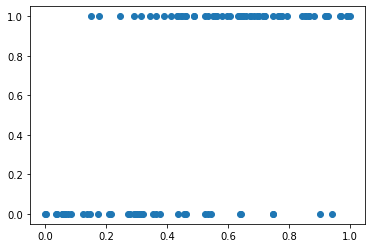

In [12]:
plt.scatter(X[0],Y)
plt.show()

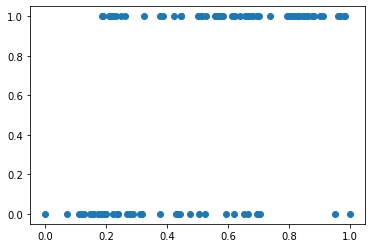

In [13]:
plt.scatter(X[1],Y)
plt.show()

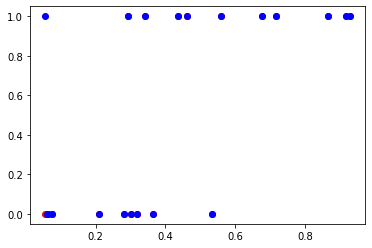

In [14]:
plt.scatter(x1_test, y_test, c='red')
plt.scatter(x1_test, y_pred, c='blue')
plt.show()

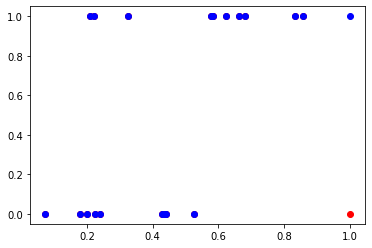

In [15]:
plt.scatter(x2_test, y_test, c='red')
plt.scatter(x2_test, y_pred, c='blue')
plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  1]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

